# Boost Local Skills to Compete in Global Market: Freelancer Profile Analysis

Mustika Tri Utami

This project analyzes Indonesia's freelancer competitiveness through multi-dimensional profiling. By identifying skill gaps, pricing advantages, and quality metrics, we provide actionable strategies to boost Indonesia's global ranking from 12th to top 10 through targeted LPK training programs.

Tableau: https://public.tableau.com/app/profile/mustika.tri.utami/viz/BoostLocalSkillstoCompeteinGlobalMarketFreelancerProfileAnalysis/BoostLocalSkillstoCompeteinGlobalMarketFreelancerProfileAnalysis

# Import Libraries

In [54]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Loading

In [55]:
df = pd.read_csv('global_freelancers_raw.csv')

df.head()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


# Data Cleaning

In [56]:
# Check information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [57]:
# Verify the column names

df.columns

Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')

In [58]:
# Drop name column because it is irrelevant with the purpose of this project

df = df.drop('name', axis=1)

## Check Duplicated Data

In [59]:
df.duplicated().sum()

0

## Gender

In [60]:
df['gender'].unique()

array(['f', 'FEMALE', 'male', 'F', 'female', 'm', 'MALE', 'Female', 'M',
       'Male'], dtype=object)

In [61]:
def gender_rename(gender):
    if gender == 'f':
        return 'female'
    elif gender == 'FEMALE':
        return 'female'
    elif gender == 'F':
        return 'female'
    elif gender == 'm':
        return 'male'
    elif gender == 'MALE':
        return 'male'
    elif gender == 'Female':
        return 'female'
    elif gender == 'M':
        return 'male'
    elif gender == 'Male':
        return 'male'

df['gender'] = df['gender'].apply(gender_rename)

In [62]:
df['gender'] = df['gender'].fillna('untold')

In [63]:
df['gender'].unique()

array(['female', 'untold', 'male'], dtype=object)

## Age

In [64]:
df['age'].unique()

array([52., 53., 38., 59., 43., 26., 40., 55., 57., 50., 42., 39., 56.,
       nan, 51., 54., 22., 34., 36., 47., 41., 46., 29., 60., 21., 35.,
       25., 23., 31., 58., 45., 33., 32., 37., 49., 27., 48., 30., 20.,
       24., 44., 28.])

In [65]:
df['age'].mean()

40.509278350515466

In [66]:
df['age'] = df['age'].fillna(df['age'].mean())

In [67]:
df['age'] = df['age'].astype(int)

In [68]:
df['age'].unique()

array([52, 53, 38, 59, 43, 26, 40, 55, 57, 50, 42, 39, 56, 51, 54, 22, 34,
       36, 47, 41, 46, 29, 60, 21, 35, 25, 23, 31, 58, 45, 33, 32, 37, 49,
       27, 48, 30, 20, 24, 44, 28])

## Country

In [69]:
df['country'].unique()

array(['Italy', 'Australia', 'Germany', 'Netherlands', 'Indonesia',
       'United States', 'Turkey', 'United Kingdom', 'Argentina', 'Japan',
       'India', 'Brazil', 'South Korea', 'Russia', 'Canada', 'France',
       'Egypt', 'South Africa', 'China', 'Mexico', 'Spain'], dtype=object)

## Language

In [70]:
df['language'].unique()

array(['Italian', 'English', 'German', 'Dutch', 'Indonesian', 'Turkish',
       'Spanish', 'Japanese', 'Hindi', 'Portuguese', 'Korean', 'Russian',
       'French', 'Arabic', 'Afrikaans', 'Mandarin'], dtype=object)

## Primary Skill

In [71]:
df['primary_skill'].unique()

array(['Blockchain Development', 'Mobile Apps', 'Graphic Design',
       'Web Development', 'AI', 'Data Analysis', 'UI/UX Design',
       'Cybersecurity', 'DevOps', 'Machine Learning'], dtype=object)

## Years of Experience

In [72]:
df['years_of_experience'].unique()

array([11., 34., 31.,  4., 27., 14., 10., 22., 17., 15., 18., 20.,  0.,
       13., nan,  3.,  9., 21.,  8., 19., 32., 28.,  6., 23.,  7.,  1.,
       33., 16., 35., 12., 38.,  5., 30.,  2., 25., 39., 29., 40., 26.,
       24., 37., 41.])

In [73]:
df['years_of_experience'] = df['years_of_experience'].fillna(df['years_of_experience'].mean())

In [74]:
df['years_of_experience'] = df['years_of_experience'].astype(int)

In [75]:
df['years_of_experience'].unique()

array([11, 34, 31,  4, 27, 14, 10, 22, 17, 15, 18, 20,  0, 13,  3,  9, 21,
        8, 19, 32, 28,  6, 23,  7,  1, 33, 16, 35, 12, 38,  5, 30,  2, 25,
       39, 29, 40, 26, 24, 37, 41])

## Hourly Rate (USD)

In [76]:
df.rename(columns={'hourly_rate (USD)': 'hourly_rate_USD'}, inplace=True)

In [77]:
df['hourly_rate_USD'].unique()

array(['100', 'USD 100', '50', '$40', '30', '$30', 'USD 75', 'USD 40',
       nan, '$50', '40', '75', 'USD 50', 'USD 30', '$20', '20', '$75',
       '$100', 'USD 20'], dtype=object)

In [78]:
df.hourly_rate_USD = df.hourly_rate_USD.str.replace('USD ', '')
df.hourly_rate_USD = df.hourly_rate_USD.str.replace('$', '')

In [79]:
df['hourly_rate_USD'] = pd.to_numeric(df['hourly_rate_USD'], errors='coerce')

In [80]:
df['hourly_rate_USD'] = df['hourly_rate_USD'].fillna(df['hourly_rate_USD'].mean())

In [81]:
df['hourly_rate_USD'] = df['hourly_rate_USD'].astype(int)

In [82]:
df['hourly_rate_USD'].unique()

array([100,  50,  40,  30,  75,  52,  20])

## Rating

In [83]:
df['rating'].unique()

array([nan, 3.3, 0. , 1.5, 4.8, 2.4, 3.1, 4.6, 4. , 3.6, 2. , 2.9, 3.7,
       1.2, 2.5, 1.1, 1.8, 4.7, 1.3, 1. , 4.2, 1.4, 2.2, 3.2, 2.7, 2.8,
       4.9, 4.5, 1.9, 3.4, 2.3, 3.9, 3.5, 4.4, 2.6, 1.6, 3.8, 1.7, 5. ,
       3. , 4.1, 4.3, 2.1])

In [84]:
df['rating'] = df['rating'].fillna(df['rating'].mean()).round(1)

In [85]:
df['rating'].unique()

array([2.5, 3.3, 0. , 1.5, 4.8, 2.4, 3.1, 4.6, 4. , 3.6, 2. , 2.9, 3.7,
       1.2, 1.1, 1.8, 4.7, 1.3, 1. , 4.2, 1.4, 2.2, 3.2, 2.7, 2.8, 4.9,
       4.5, 1.9, 3.4, 2.3, 3.9, 3.5, 4.4, 2.6, 1.6, 3.8, 1.7, 5. , 3. ,
       4.1, 4.3, 2.1])

## Is Active

In [86]:
df['is_active'].unique()

array(['0', '1', 'N', 'False', 'True', 'yes', 'Y', nan, 'no'],
      dtype=object)

In [87]:
is_active_mapping = {
    '0' : 'no',
    '1' : 'yes',
    'N' : 'no',
    'False' : 'no',
    'True' : 'yes',
    'Y' : 'yes',
}

df['is_active'] = df['is_active'].replace(is_active_mapping)

In [88]:
df['is_active'] = df['is_active'].fillna('unknown')

In [89]:
df['is_active'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

## Client Satisfaction

In [90]:
df['client_satisfaction'].unique()

array([nan, '84%', '71%', '90%', '83%', '94%', '76%', '77%', '86%', '93%',
       '70%', '69%', '60%', '87%', '75%', '68%', '65%', '100%', '92',
       '89%', '62%', '82', '81%', '63%', '67%', '80%', '74%', '85%',
       '79%', '72%', '64', '88', '96%', '96', '81', '61%', '97%', '64%',
       '73%', '88%', '72', '92%', '82%', '93', '83', '78', '95%', '80',
       '87', '66%', '78%', '68', '91%', '97', '60', '70', '99%', '76',
       '86', '95', '74', '100', '73', '67', '77', '98%', '71', '85', '91',
       '94', '84', '90', '62', '65', '75', '63', '61', '66', '99', '79',
       '69', '89'], dtype=object)

In [91]:
df['client_satisfaction'] = df['client_satisfaction'].replace('%', '')

In [92]:
df['client_satisfaction'] = pd.to_numeric(df['client_satisfaction'], errors="coerce")

In [93]:
df['client_satisfaction'] = df['client_satisfaction'].fillna(df['client_satisfaction'].mean())

In [94]:
df['client_satisfaction'] = df['client_satisfaction'].astype(int)

In [95]:
df['client_satisfaction'].unique()

array([ 79,  92,  82,  64,  88,  96,  81,  72,  93,  83,  78,  80,  87,
        68,  97,  60,  70,  76,  86,  95,  74, 100,  73,  67,  77,  71,
        85,  91,  94,  84,  90,  62,  65,  75,  63,  61,  66,  99,  69,
        89])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   gender               1000 non-null   object 
 2   age                  1000 non-null   int32  
 3   country              1000 non-null   object 
 4   language             1000 non-null   object 
 5   primary_skill        1000 non-null   object 
 6   years_of_experience  1000 non-null   int32  
 7   hourly_rate_USD      1000 non-null   int32  
 8   rating               1000 non-null   float64
 9   is_active            1000 non-null   object 
 10  client_satisfaction  1000 non-null   int32  
dtypes: float64(1), int32(4), object(6)
memory usage: 70.4+ KB


## Export Clean Data

In [113]:
df.to_csv('global_freelancers_clean.csv', index=False)

# Exploratory Data Analysis

## Indonesia Ranking in Global Market

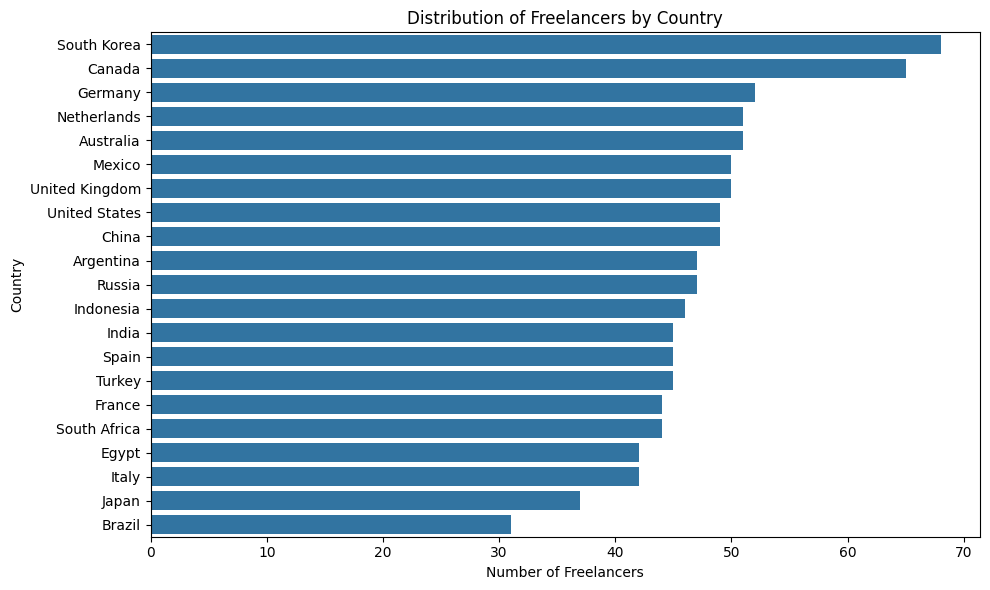

In [97]:
# Visualize Indonesia's ranking in the global freelancer market

country_counts = df['country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Distribution of Freelancers by Country')
plt.xlabel('Number of Freelancers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [98]:
# Total of freelancer from Indonesia

indo_counts = df['country'].value_counts().get('Indonesia', 0)

indo_counts

46

In [99]:
# Total of freelancer from top country

sk_counts = df['country'].value_counts().get('South Korea', 0)

sk_counts

68

In [100]:
# Total of freelancer from top 10 country

ar_counts = df['country'].value_counts().get('Argentina', 0)

ar_counts

47

- Ranking: Indonesia is ranked 12th globally in terms of freelancer representation.

- Freelancer count: There are 46 freelancers from Indonesia in the dataset, representing approximately 4.6% of the total sample.

- Comparison to global workforce: Indonesia's sample proportion (4.6%) is higher than its proportion of the global workforce (3.43%).

- Benchmark gap: Despite this overrepresentation in the sample, Indonesia still lags significantly behind top countries like South Korea, which has 68 freelancers in the dataset.

- Target goal: To break into the top 10 (currently held by Argentina with 47 freelancers), Indonesia would need to increase its freelancer count by at least 2.

## Indonesian Freelancers Performance

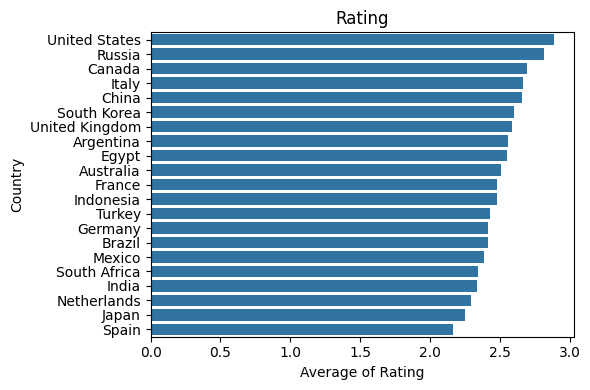

In [109]:
rating_mean = df.groupby('country')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=rating_mean.values, y=rating_mean.index)
plt.title('Rating')
plt.xlabel('Average of Rating')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

- Current position: Indonesia ranks 12th globally in average freelancer ratings, placing it outside the top 10 countries.

- Middle-tier performance: Indonesia sits in the middle of the global ranking, indicating average service quality perception compared to international peers.

- Top performers gap: Leading countries (United States, Russia, Canada) have significantly higher average ratings, suggesting room for quality improvement.

## Client Satisfaction

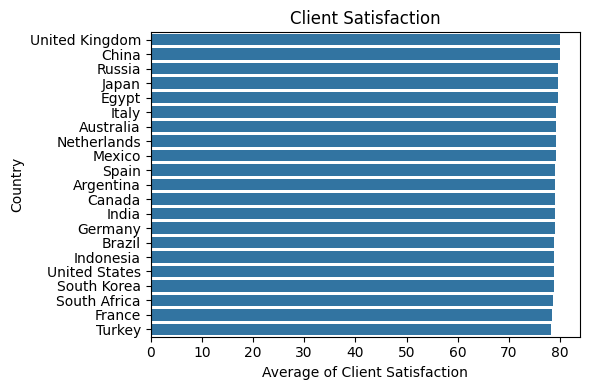

In [110]:
sati = df.groupby('country')['client_satisfaction'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=sati.values, y=sati.index)
plt.title('Client Satisfaction')
plt.xlabel('Average of Client Satisfaction')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

- Indonesia ranks 16th in client satisfaction, significantly outside the top 10 countries.

- The client satisfaction metric shows highly competitive results across all countries.

- Client satisfaction directly affects repeat business and long-term client relationships.

- Low satisfaction scores may limit growth despite competitive pricing and skills.

## What Skill We Need to Improve

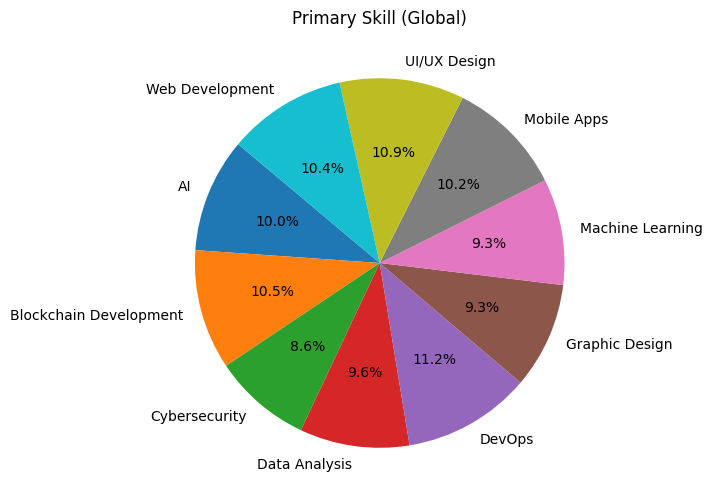

In [ ]:
# Visualize Skill of Global Freelancers

skill_counts = df['primary_skill'].value_counts().sort_index() 

plt.figure(figsize=(6, 6))
plt.pie(skill_counts, labels=skill_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Primary Skill (Global)')
plt.show()

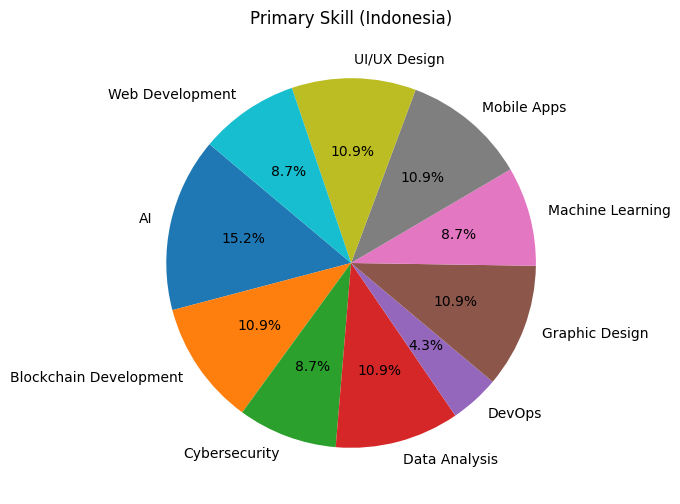

In [ ]:
# Visualize Skill of Indonesian Freelancers

indo_df = df[df['country'] == 'Indonesia']

skill_counts_indo = indo_df['primary_skill'].value_counts().sort_index() 

plt.figure(figsize=(6, 6))
plt.pie(skill_counts_indo, labels=skill_counts_indo.index, autopct='%1.1f%%', startangle=140)
plt.title('Primary Skill (Indonesia)')
plt.show()

- Overall position: Indonesian freelancers show competitive skill distribution in several domains, with some areas outperforming global averages.

- Critical skills gap - DevOps: Indonesia = 4.3% vs Global = 11.2%. This represents the largest skill gap requiring immediate attention.

- Machine learning deficit: Indonesian freelancers in ML trail behind global benchmarks. Specific training programs needed to close this emerging technology gap.

- Web development lag: Indonesia's web development representation remains below global standards. This foundational digital skill requires strengthening.

- Competitive areas - UI/UX Design: Indonesian freelancers match global levels.

## Higher Earnings Potential

In [103]:
rate_mean = df['hourly_rate_USD'].mean()
rate_mean


52.418

In [108]:
rate_indo_mean = indo_df['hourly_rate_USD'].mean()

rate_indo_mean

57.04347826086956

- Indonesian freelancers command higher average hourly rates compared to the global average.

- Higher earning potential provides better livelihood and financial stability.

## Inclusive Career Opportunities: Age Diversity Advantage

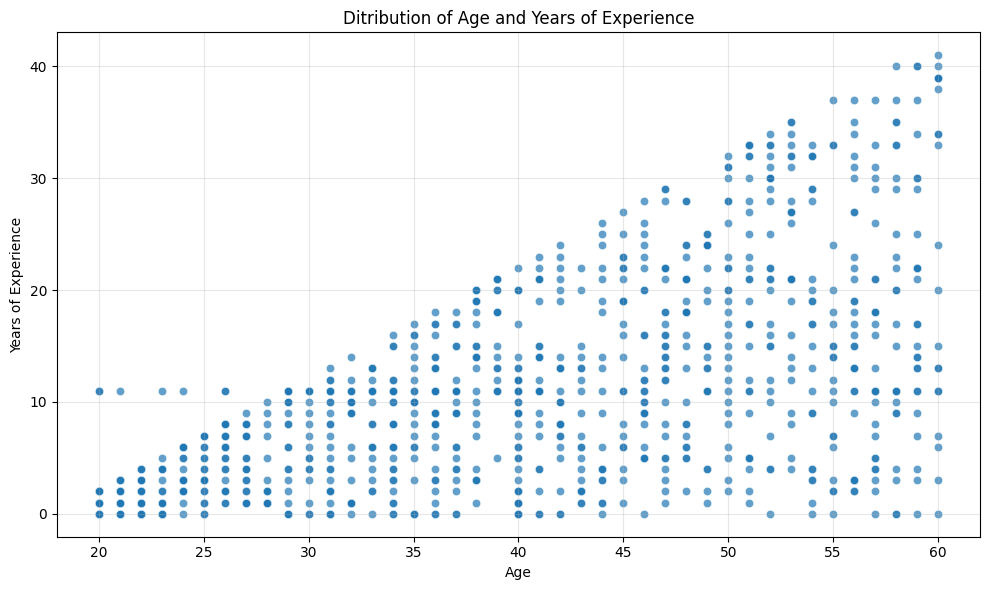

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='years_of_experience', alpha=0.7)
plt.title('Ditribution of Age and Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

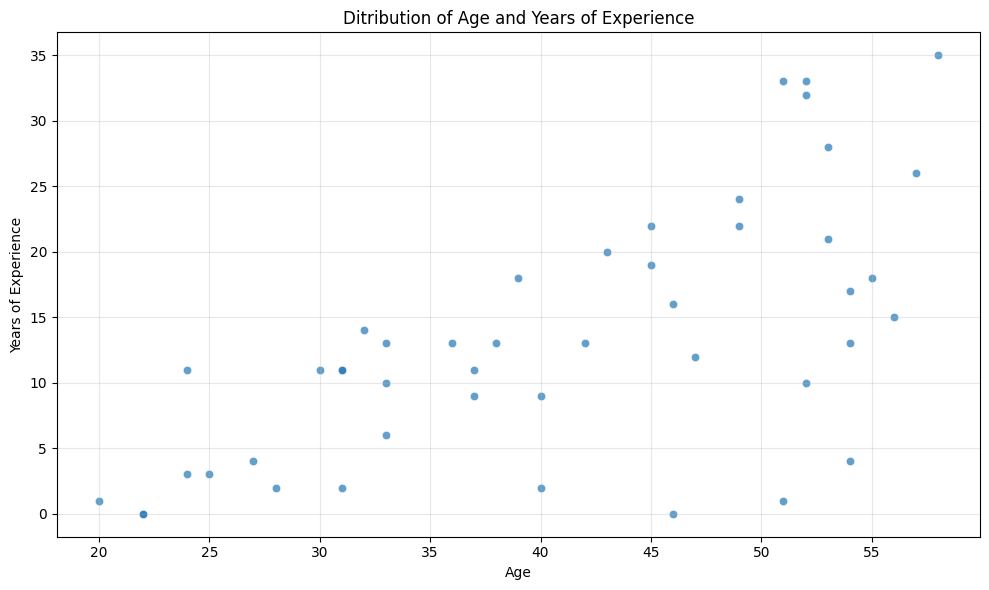

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=indo_df, x='age', y='years_of_experience', alpha=0.7)
plt.title('Ditribution of Age and Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- The freelancing profession demonstrates remarkable age inclusivity and career flexibility opportunities.

- Freelancing is accessible to all age groups (20-60 years), making it a viable career path regardless of age.

- Indonesian freelancers are evenly distributed across age ranges, indicating healthy demographic representation.

- The profession allows for successful career switches even at 40+ years of age.

- Freelancing can absorb workers from various age groups, reducing unemployment across generations.

- Provides opportunities for mid-career professionals to transition into digital professions.

# Conclusion and Strategic Recommendations

Based on comprehensive analysis of global freelancer profiles, Indonesia demonstrates significant potential while facing specific challenges in:

1. Competitive Ranking: #12 globally with 4.6% representation

2. Critical Skill Gaps: DevOps, Machine Learning, and Web Development

3. Service Quality: Client satisfaction ranking requiring improvement (#16)

4. Potential Advantages: Higher hourly rates and inclusive age distribution

Strategic Recommendations:

1. Skill Gap-Based Training Programs
    - High Priority: Intensive DevOps and Cloud Computing bootcamps

    - Medium Priority: Machine Learning and modern Web Development certifications

    - Advanced Training: Soft skills and client management to improve ratings

2. Global Ranking Improvement Roadmap
    - Short-term target: Rise to #10 ranking by adding 2+ skilled freelancers

    - Medium-term target: Top 5 in Southeast Asia within 2 years

    - Success indicators: Increased freelancer representation on global platforms

3. Freelance Ecosystem Development Policies
    - National certification: Indonesian freelancer competency recognition scheme

    - Platform matching: Facilitating connections between freelancers and global markets

    - Mentorship programs: Pairing senior freelancers with beginners

4. Generational Inclusion Strategy
    - Multi-generation training: Different curricula for ages 20-35 vs 36-60

    - Career transition programs: Specifically for professionals aged 35+ seeking transition

    - Flexible learning pathways: Adaptive online-offline combinations

With implementation of these recommendations, Indonesia can:

- Improve global ranking from #12 to top 10

- Close critical skill gaps within 18-24 months

- Increase foreign exchange earnings from freelance sector

- Absorb workforce from various generations